# Model 3이 시간의 흐름에 따른 CGM의 변화, 패턴을 보여줌 1-4중에 가장 설명력이 높음
## Within, between person 효과와 GE 여부를 0,1로 표현하여 개인차를 더한 모델 추가

In [4]:
import pandas as pd
import numpy as np

input_path = "/Users/bg.lim/Downloads/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/Preprocessing/2.Within_day_hunger_CGM/sorted_oldest_data.xlsx"
Data = pd.read_excel(input_path, engine="openpyxl")

In [6]:
Data

,StudyID,Timestamp,bored,hungry,How_happy,How_cheerful,How_relaxed,How_stressed,How_anxious,How_angry,...,CGM_60_GE_count,CGM_90min_mean,CGM_90min_sd,CGM_90min_max,CGM_90min_cv,CGM_90_GV,CGM_90_GE_count,GE_30min_occurred,GE_60min_occurred,GE_90min_occurred
0,1,2022-10-06 08:11:56,0.0,0.0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,1,88.000000,5.253570,98,5.969966,Low,1,0,1,1
1,1,2022-10-06 13:37:27,0.0,0.0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,0,99.500000,7.503333,106,7.541038,Low,0,0,0,0
2,1,2022-10-06 15:39:36,0.0,0.0,1.000000,1.000000,1.000000,0.000000,0.333333,0.0,...,0,105.333333,2.658320,109,2.523722,Low,2,0,0,1
3,1,2022-10-06 16:28:38,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,...,1,104.166667,1.329160,106,1.275994,Low,1,0,1,1
4,1,2022-10-06 18:23:32,0.0,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,...,1,95.833333,5.382069,105,5.616072,Low,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3722,89,2023-05-08 18:58:36,0.0,0.0,1.000000,1.000000,0.666667,0.333333,0.333333,0.0,...,1,128.666667,16.256281,149,12.634415,Low,2,0,1,1
3723,89,2023-05-09 09:09:45,0.0,0.0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,1,110.333333,16.157558,132,14.644312,Low,2,0,1,1
3724,89,2023-05-09 11:22:51,0.0,1.0,1.000000,1.000000,0.333333,0.333333,0.000000,0.0,...,1,98.666667,12.077527,123,12.240737,Low,1,0,1,1
3725,89,2023-05-09 15:28:26,0.0,0.0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,0,85.500000,5.009990,92,5.859637,Low,1,0,0,1


In [8]:
Data.head(10)

,StudyID,Timestamp,bored,hungry,How_happy,How_cheerful,How_relaxed,How_stressed,How_anxious,How_angry,...,CGM_60_GE_count,CGM_90min_mean,CGM_90min_sd,CGM_90min_max,CGM_90min_cv,CGM_90_GV,CGM_90_GE_count,GE_30min_occurred,GE_60min_occurred,GE_90min_occurred
0,1,2022-10-06 08:11:56,0.0,0.0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,1,88.000000,5.253570,98,5.969966,Low,1,0,1,1
1,1,2022-10-06 13:37:27,0.0,0.0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,0,99.500000,7.503333,106,7.541038,Low,0,0,0,0
2,1,2022-10-06 15:39:36,0.0,0.0,1.000000,1.000000,1.000000,0.000000,0.333333,0.0,...,0,105.333333,2.658320,109,2.523722,Low,2,0,0,1
3,1,2022-10-06 16:28:38,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,...,1,104.166667,1.329160,106,1.275994,Low,1,0,1,1
4,1,2022-10-06 18:23:32,0.0,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,...,1,95.833333,5.382069,105,5.616072,Low,1,0,1,1
5,1,2022-10-07 08:34:28,0.0,0.0,0.666667,1.000000,1.000000,0.000000,0.000000,0.0,...,1,72.833333,6.493587,83,8.915680,Low,1,0,1,1
6,1,2022-10-07 14:28:40,0.0,0.0,1.000000,1.000000,1.000000,0.333333,0.333333,0.0,...,1,66.500000,2.880972,70,4.332289,Low,2,0,1,1
7,1,2022-10-07 17:28:00,0.0,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,...,1,70.000000,2.529822,74,3.614032,Low,1,0,1,1
8,1,2022-10-07 19:02:26,0.0,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,...,0,70.666667,1.032796,72,1.461503,Low,1,0,0,1
9,1,2022-10-08 08:44:27,0.0,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,...,0,108.166667,17.792320,124,16.448987,Low,0,0,0,0


In [12]:
data = Data

In [34]:
df = data
df

,StudyID,Timestamp,bored,hungry,How_happy,How_cheerful,How_relaxed,How_stressed,How_anxious,How_angry,...,CGM_90min_sd,CGM_90min_max,CGM_90min_cv,CGM_90_GV,CGM_90_GE_count,GE_30min_occurred,GE_60min_occurred,GE_90min_occurred,Date,Within_day
0,1,2022-10-06 08:11:56,0.0,0.0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,5.253570,98,5.969966,Low,1,0,1,1,2022-10-06,1_2022-10-06
1,1,2022-10-06 13:37:27,0.0,0.0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,7.503333,106,7.541038,Low,0,0,0,0,2022-10-06,1_2022-10-06
2,1,2022-10-06 15:39:36,0.0,0.0,1.000000,1.000000,1.000000,0.000000,0.333333,0.0,...,2.658320,109,2.523722,Low,2,0,0,1,2022-10-06,1_2022-10-06
3,1,2022-10-06 16:28:38,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,...,1.329160,106,1.275994,Low,1,0,1,1,2022-10-06,1_2022-10-06
4,1,2022-10-06 18:23:32,0.0,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,...,5.382069,105,5.616072,Low,1,0,1,1,2022-10-06,1_2022-10-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3722,89,2023-05-08 18:58:36,0.0,0.0,1.000000,1.000000,0.666667,0.333333,0.333333,0.0,...,16.256281,149,12.634415,Low,2,0,1,1,2023-05-08,89_2023-05-08
3723,89,2023-05-09 09:09:45,0.0,0.0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,16.157558,132,14.644312,Low,2,0,1,1,2023-05-09,89_2023-05-09
3724,89,2023-05-09 11:22:51,0.0,1.0,1.000000,1.000000,0.333333,0.333333,0.000000,0.0,...,12.077527,123,12.240737,Low,1,0,1,1,2023-05-09,89_2023-05-09
3725,89,2023-05-09 15:28:26,0.0,0.0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,5.009990,92,5.859637,Low,1,0,0,1,2023-05-09,89_2023-05-09


In [36]:
import pandas as pd
# Timestamp에서 날짜 생성 및 Within_day 컬럼
df['Date'] = pd.to_datetime(df['Timestamp']).dt.date
df['Within_day'] = df['StudyID'].astype(str) + "_" + df['Date'].astype(str)

df


,StudyID,Timestamp,bored,hungry,How_happy,How_cheerful,How_relaxed,How_stressed,How_anxious,How_angry,...,CGM_90min_sd,CGM_90min_max,CGM_90min_cv,CGM_90_GV,CGM_90_GE_count,GE_30min_occurred,GE_60min_occurred,GE_90min_occurred,Date,Within_day
0,1,2022-10-06 08:11:56,0.0,0.0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,5.253570,98,5.969966,Low,1,0,1,1,2022-10-06,1_2022-10-06
1,1,2022-10-06 13:37:27,0.0,0.0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,7.503333,106,7.541038,Low,0,0,0,0,2022-10-06,1_2022-10-06
2,1,2022-10-06 15:39:36,0.0,0.0,1.000000,1.000000,1.000000,0.000000,0.333333,0.0,...,2.658320,109,2.523722,Low,2,0,0,1,2022-10-06,1_2022-10-06
3,1,2022-10-06 16:28:38,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,...,1.329160,106,1.275994,Low,1,0,1,1,2022-10-06,1_2022-10-06
4,1,2022-10-06 18:23:32,0.0,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,...,5.382069,105,5.616072,Low,1,0,1,1,2022-10-06,1_2022-10-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3722,89,2023-05-08 18:58:36,0.0,0.0,1.000000,1.000000,0.666667,0.333333,0.333333,0.0,...,16.256281,149,12.634415,Low,2,0,1,1,2023-05-08,89_2023-05-08
3723,89,2023-05-09 09:09:45,0.0,0.0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,16.157558,132,14.644312,Low,2,0,1,1,2023-05-09,89_2023-05-09
3724,89,2023-05-09 11:22:51,0.0,1.0,1.000000,1.000000,0.333333,0.333333,0.000000,0.0,...,12.077527,123,12.240737,Low,1,0,1,1,2023-05-09,89_2023-05-09
3725,89,2023-05-09 15:28:26,0.0,0.0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,5.009990,92,5.859637,Low,1,0,0,1,2023-05-09,89_2023-05-09


In [42]:
input_path = "/Users/bg.lim/Downloads/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/Preprocessing/2.Within_day_hunger_CGM/within_data.xlsx"
df.to_excel(input_path, index=False)



In [50]:
from sklearn.preprocessing import LabelEncoder

# Within_day를 숫자로 변환
df['Within_day_num'] = LabelEncoder().fit_transform(df['Within_day'])

In [62]:
df

,StudyID,Timestamp,bored,hungry,How_happy,How_cheerful,How_relaxed,How_stressed,How_anxious,How_angry,...,CGM_90min_max,CGM_90min_cv,CGM_90_GV,CGM_90_GE_count,GE_30min_occurred,GE_60min_occurred,GE_90min_occurred,Date,Within_day,Within_day_num
0,1,2022-10-06 08:11:56,0.0,0.0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,98,5.969966,Low,1,0,1,1,2022-10-06,1_2022-10-06,75
1,1,2022-10-06 13:37:27,0.0,0.0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,106,7.541038,Low,0,0,0,0,2022-10-06,1_2022-10-06,75
2,1,2022-10-06 15:39:36,0.0,0.0,1.000000,1.000000,1.000000,0.000000,0.333333,0.0,...,109,2.523722,Low,2,0,0,1,2022-10-06,1_2022-10-06,75
3,1,2022-10-06 16:28:38,0.0,0.0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,...,106,1.275994,Low,1,0,1,1,2022-10-06,1_2022-10-06,75
4,1,2022-10-06 18:23:32,0.0,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,...,105,5.616072,Low,1,0,1,1,2022-10-06,1_2022-10-06,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3722,89,2023-05-08 18:58:36,0.0,0.0,1.000000,1.000000,0.666667,0.333333,0.333333,0.0,...,149,12.634415,Low,2,0,1,1,2023-05-08,89_2023-05-08,737
3723,89,2023-05-09 09:09:45,0.0,0.0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,132,14.644312,Low,2,0,1,1,2023-05-09,89_2023-05-09,738
3724,89,2023-05-09 11:22:51,0.0,1.0,1.000000,1.000000,0.333333,0.333333,0.000000,0.0,...,123,12.240737,Low,1,0,1,1,2023-05-09,89_2023-05-09,738
3725,89,2023-05-09 15:28:26,0.0,0.0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,92,5.859637,Low,1,0,0,1,2023-05-09,89_2023-05-09,738


In [70]:
# 필요한 변수만 선택
model_data = df[['CGM_30min_mean', 'hungry', 'StudyID','Within_day_num']]

# 결측치 확인
print(model_data.isnull().sum())

# 결측치 제거
model_data = model_data.dropna()
print(model_data.shape)  # 데이터 크기 확인


CGM_30min_mean    0
hungry            2
StudyID           0
Within_day_num    0
dtype: int64
(3725, 4)


In [76]:
# 결측치 확인
print(model_data.isnull().sum())

CGM_30min_mean    0
hungry            0
StudyID           0
Within_day_num    0
dtype: int64


In [78]:
# StudyID가 제대로 설정되었는지 확인
print(model_data['StudyID'].unique())
print(model_data['StudyID'].isnull().sum())

[ 1  2  3  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24 25 26 27 28
 29 30 31 32 33 34 36 39 40 41 42 43 44 45 46 47 48 49 50 52 53 54 56 57
 59 60 61 62 63 65 66 67 69 70 71 72 73 74 75 77 78 79 81 82 83 84 85 86
 87 89]
0


In [80]:

# StudyID를 문자형으로 변환 (문제 방지)
model_data['StudyID'] = model_data['StudyID'].astype(str)

In [82]:
# Within_day_num 확인
print(model_data['Within_day_num'].isnull().sum())
print(model_data['Within_day_num'].unique())

# Within_day_num을 정수형으로 변환 (필요시)
model_data['Within_day_num'] = model_data['Within_day_num'].astype(int)


0
[ 75  76  77  78  79  80  81  82  83 138 139 140 141 142 143 144 145 146
 147 206 207 208 209 629 630 631 632 633 634 635 636 637 638 639 640 641
 739 740 741 742 743 744 745 746 747 748 749 750 751 752 753 754 755 756
 757 758 759 760 761 762 763 764   0   1   2   3   4   5   6   7   8   9
  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190
 191 192 193 194 195 196 197 198 199 200 201 202 

In [84]:
# 인덱스 재설정
model_data = model_data.reset_index(drop=True)

# 데이터 확인
print(model_data.shape)
print(model_data.head())


(3725, 4)
   CGM_30min_mean  hungry StudyID  Within_day_num
0            90.5     0.0       1              75
1            91.0     0.0       1              75
2           108.5     0.0       1              75
3           104.5     0.0       1              75
4           100.0     0.0       1              75


In [86]:
# Within_day를 고정효과로 추가
model = smf.mixedlm("CGM_30min_mean ~ hungry + Within_day_num", 
                    df, 
                    groups=df["StudyID"])

result = model.fit()
print(result.summary())


IndexError: index 3725 is out of bounds for axis 0 with size 3725

In [88]:
# 데이터프레임 크기 확인
print("Data shape:", df.shape)

# 변수별 결측치 확인
print(df[['CGM_30min_mean', 'hungry', 'Within_day_num', 'StudyID']].isnull().sum())

# 데이터 타입 확인
print(df[['CGM_30min_mean', 'hungry', 'Within_day_num', 'StudyID']].dtypes)

# StudyID의 고유값 확인
print(df['StudyID'].nunique())
print(df['StudyID'].unique())


Data shape: (3727, 42)
CGM_30min_mean    0
hungry            2
Within_day_num    0
StudyID           0
dtype: int64
CGM_30min_mean    float64
hungry            float64
Within_day_num      int64
StudyID             int64
dtype: object
74
[ 1  2  3  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24 25 26 27 28
 29 30 31 32 33 34 36 39 40 41 42 43 44 45 46 47 48 49 50 52 53 54 56 57
 59 60 61 62 63 65 66 67 69 70 71 72 73 74 75 77 78 79 81 82 83 84 85 86
 87 89]


In [90]:
# hungry 변수 결측치 제거
model_data = df[['CGM_30min_mean', 'hungry', 'Within_day_num', 'StudyID']].dropna()

# 인덱스 재설정
model_data = model_data.reset_index(drop=True)

# 결측치 제거 후 데이터 크기 확인
print("Cleaned data shape:", model_data.shape)
print(model_data.isnull().sum())


Cleaned data shape: (3725, 4)
CGM_30min_mean    0
hungry            0
Within_day_num    0
StudyID           0
dtype: int64


In [92]:
import statsmodels.formula.api as smf

# 혼합효과 모델 실행
model = smf.mixedlm("CGM_30min_mean ~ hungry + Within_day_num", 
                    model_data, 
                    groups=model_data["StudyID"])

result = model.fit()
print(result.summary())


           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: CGM_30min_mean
No. Observations: 3725    Method:             REML          
No. Groups:       74      Scale:              321.0076      
Min. group size:  11      Log-Likelihood:     -16147.7740   
Max. group size:  74      Converged:          Yes           
Mean group size:  50.3                                      
------------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025  0.975]
------------------------------------------------------------
Intercept       101.293    2.511 40.341 0.000 96.372 106.214
hungry           -6.477    0.693 -9.342 0.000 -7.836  -5.118
Within_day_num   -0.000    0.006 -0.010 0.992 -0.012   0.012
Group Var       135.505    1.368                            



# CGM3 : 30-60-90을 Long format으로 변환

In [45]:
import pandas as pd

# 엑셀 파일 불러오기
df = pd.read_excel('/Users/bg.lim/Downloads/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/Preprocessing/3.within_timepoint/Timepoint_null.xlsx', engine='openpyxl')  # 파일 경로 지정



In [47]:
df

,StudyID,Timestamp,bored,hungry,How_happy,How_cheerful,How_relaxed,How_stressed,How_anxious,How_angry,...,CGM_90min_max,CGM_90min_cv,CGM_90_GV,CGM_90_GE_count,GE_30min_occurred,GE_60min_occurred,GE_90min_occurred,Date,Within_day,within_day_num
0,1,2022-10-06 08:11:56,0,0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,98,5.969966,Low,1,0,1,1,2022-10-06,1_2022-10-06,75
1,1,2022-10-06 13:37:27,0,0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,106,7.541038,Low,0,0,0,0,2022-10-06,1_2022-10-06,75
2,1,2022-10-06 15:39:36,0,0,1.000000,1.000000,1.000000,0.000000,0.333333,0.0,...,109,2.523722,Low,2,0,0,1,2022-10-06,1_2022-10-06,75
3,1,2022-10-06 16:28:38,0,0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,...,106,1.275994,Low,1,0,1,1,2022-10-06,1_2022-10-06,75
4,1,2022-10-06 18:23:32,0,0,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,...,105,5.616072,Low,1,0,1,1,2022-10-06,1_2022-10-06,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,89,2023-05-08 18:58:36,0,0,1.000000,1.000000,0.666667,0.333333,0.333333,0.0,...,149,12.634415,Low,2,0,1,1,2023-05-08,89_2023-05-08,737
3650,89,2023-05-09 09:09:45,0,0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,132,14.644312,Low,2,0,1,1,2023-05-09,89_2023-05-09,738
3651,89,2023-05-09 11:22:51,0,1,1.000000,1.000000,0.333333,0.333333,0.000000,0.0,...,123,12.240737,Low,1,0,1,1,2023-05-09,89_2023-05-09,738
3652,89,2023-05-09 15:28:26,0,0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,92,5.859637,Low,1,0,0,1,2023-05-09,89_2023-05-09,738


In [49]:
# Timestamp에서 날짜 추출
df['Date'] = pd.to_datetime(df['Timestamp']).dt.date

# StudyID와 Date를 결합하여 고유한 within_day_num 생성
df['within_day_num'] = (df['StudyID'].astype(str) + "_" + df['Date'].astype(str))

# within_day_num을 숫자형(Label Encoding)으로 변환
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['within_day_num'] = le.fit_transform(df['within_day_num'])

# 확인
print(df[['StudyID', 'Date', 'within_day_num']].head())


   StudyID        Date  within_day_num
0        1  2022-10-06              75
1        1  2022-10-06              75
2        1  2022-10-06              75
3        1  2022-10-06              75
4        1  2022-10-06              75


In [51]:
# StudyID별 고유한 within_day_num 개수 확인
unique_within_day_per_study = df.groupby('StudyID')['within_day_num'].nunique()
print(unique_within_day_per_study)


StudyID
1      9
2     10
3      4
7     13
8     13
      ..
84    13
85     3
86    13
87    13
89    13
Name: within_day_num, Length: 74, dtype: int64


In [53]:

# 필요한 변수만 선택
model_data = df[['StudyID', 'within_day_num', 'hungry', 
                 'CGM_30min_mean', 'CGM_60min_mean', 'CGM_90min_mean']]

# 데이터를 Long Format으로 변환
model_data_long = model_data.melt(
    id_vars=['StudyID', 'within_day_num', 'hungry'], 
    value_vars=['CGM_30min_mean', 'CGM_60min_mean', 'CGM_90min_mean'], 
    var_name='Timepoint', 
    value_name='CGM_mean'
)

# 시간대(Timepoint) 변수를 숫자로 변환 (30, 60, 90)
model_data_long['Timepoint'] = model_data_long['Timepoint'].str.extract('(\d+)').astype(int)

# 확인
print(model_data_long.head())

   StudyID  within_day_num  hungry  Timepoint  CGM_mean
0        1              75       0         30      90.5
1        1              75       0         30      91.0
2        1              75       0         30     108.5
3        1              75       0         30     104.5
4        1              75       0         30     100.0


<>:14: SyntaxWarning: invalid escape sequence '\d'
<>:14: SyntaxWarning: invalid escape sequence '\d'
/var/folders/r0/h30ywvr55x98xwjf49klh76m0000gp/T/ipykernel_28302/1009019340.py:14: SyntaxWarning: invalid escape sequence '\d'
  model_data_long['Timepoint'] = model_data_long['Timepoint'].str.extract('(\d+)').astype(int)


In [55]:
print("Length of dependent variable:", len(model_data_long['CGM_mean']))
print("Length of independent variables:", len(model_data_long[['hungry', 'Timepoint']]))


Length of dependent variable: 10962
Length of independent variables: 10962


In [57]:
# 필요한 변수만 선택
df_long = df.melt(
    id_vars=['StudyID', 'hungry', 'within_day_num', 'Timestamp'],  # 고정 변수
    value_vars=['CGM_30min_mean', 'CGM_60min_mean', 'CGM_90min_mean'],  # 시간대별 CGM 값
    var_name='Timepoint',  # 시간대 변수 이름
    value_name='CGM_mean'  # CGM 평균 값 이름
)

# Timepoint를 숫자로 변환 (30, 60, 90)
df_long['Timepoint'] = df_long['Timepoint'].str.extract('(\d+)').astype(int)

# 결과 확인
print(df_long.head())


   StudyID  hungry  within_day_num           Timestamp  Timepoint  CGM_mean
0        1       0              75 2022-10-06 08:11:56         30      90.5
1        1       0              75 2022-10-06 13:37:27         30      91.0
2        1       0              75 2022-10-06 15:39:36         30     108.5
3        1       0              75 2022-10-06 16:28:38         30     104.5
4        1       0              75 2022-10-06 18:23:32         30     100.0


<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
/var/folders/r0/h30ywvr55x98xwjf49klh76m0000gp/T/ipykernel_28302/1338880443.py:10: SyntaxWarning: invalid escape sequence '\d'
  df_long['Timepoint'] = df_long['Timepoint'].str.extract('(\d+)').astype(int)


In [59]:
# 결측치 제거
df_long_clean = df_long.dropna(subset=['CGM_mean', 'hungry', 'Timepoint']).reset_index(drop=True)

# 데이터 크기 확인
print("Data shape:", df_long_clean.shape)
print(df_long_clean.head())


Data shape: (10962, 6)
   StudyID  hungry  within_day_num           Timestamp  Timepoint  CGM_mean
0        1       0              75 2022-10-06 08:11:56         30      90.5
1        1       0              75 2022-10-06 13:37:27         30      91.0
2        1       0              75 2022-10-06 15:39:36         30     108.5
3        1       0              75 2022-10-06 16:28:38         30     104.5
4        1       0              75 2022-10-06 18:23:32         30     100.0


In [61]:
import statsmodels.formula.api as smf

# 기본 혼합효과 모델 실행 (re_formula 없이)
model = smf.mixedlm(
    "CGM_mean ~ hungry * Timepoint",  # 고정효과: 배고픔, 시간대, 상호작용
    df_long_clean,                   # 깨끗한 데이터셋
    groups=df_long_clean["StudyID"]  # 랜덤 효과: 참가자별
)

result = model.fit()
print(result.summary())


            Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  CGM_mean   
No. Observations:   10962    Method:              REML       
No. Groups:         74       Scale:               277.3667   
Min. group size:    33       Log-Likelihood:      -46548.5167
Max. group size:    222      Converged:           Yes        
Mean group size:    148.1                                    
-------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z| [0.025  0.975]
-------------------------------------------------------------
Intercept        101.455    1.479 68.590 0.000 98.556 104.354
hungry            -7.702    0.935 -8.239 0.000 -9.534  -5.870
Timepoint         -0.013    0.008 -1.682 0.093 -0.028   0.002
hungry:Timepoint   0.064    0.014  4.502 0.000  0.036   0.092
Group Var        142.710    1.454                            



/var/folders/r0/h30ywvr55x98xwjf49klh76m0000gp/T/ipykernel_28302/1225695446.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(x='Timepoint', y='CGM_mean', hue='hungry', data=model_data_long, ci=95)


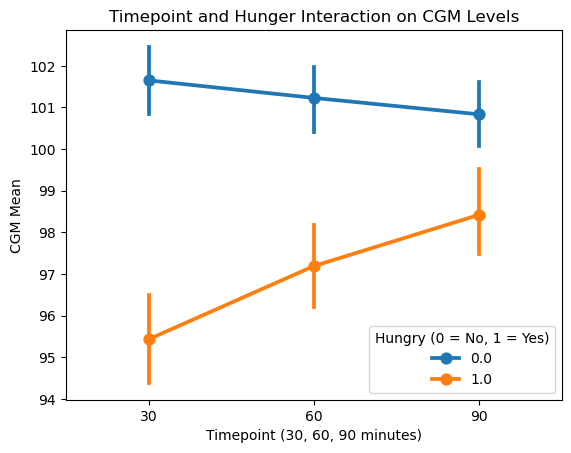

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시간대별 hungry 유무에 따른 CGM 값 시각화
sns.pointplot(x='Timepoint', y='CGM_mean', hue='hungry', data=model_data_long, ci=95)
plt.title("Timepoint and Hunger Interaction on CGM Levels")
plt.xlabel("Timepoint (30, 60, 90 minutes)")
plt.ylabel("CGM Mean")
plt.legend(title="Hungry (0 = No, 1 = Yes)")
plt.show()


In [31]:
import numpy as np

# AIC와 BIC 계산
log_likelihood = result.llf  # Log-Likelihood
n_params = result.params.shape[0]  # 파라미터 수
n_obs = df_long.shape[0]  # 전체 관측치 수

# AIC와 BIC 계산
aic = -2 * log_likelihood + 2 * n_params
bic = -2 * log_likelihood + n_params * np.log(n_obs)

print(f"AIC: {aic:.2f}")
print(f"BIC: {bic:.2f}")


AIC: 94884.15
BIC: 94920.76


In [37]:
import os
# 저장할 폴더와 파일 경로
folder_path = '/Users/bg.lim/Downloads/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/Preprocessing/3.within_timepoint'
file_path = os.path.join(folder_path, 'timepoint.xlsx')

# 폴더 생성 및 엑셀 저장
os.makedirs(folder_path, exist_ok=True)  # 폴더가 없으면 생성
df.to_excel(file_path, index=False, engine='openpyxl')

# 공변량 5개 추가

In [67]:
df

,StudyID,Timestamp,bored,hungry,How_happy,How_cheerful,How_relaxed,How_stressed,How_anxious,How_angry,...,CGM_90min_max,CGM_90min_cv,CGM_90_GV,CGM_90_GE_count,GE_30min_occurred,GE_60min_occurred,GE_90min_occurred,Date,Within_day,within_day_num
0,1,2022-10-06 08:11:56,0,0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,98,5.969966,Low,1,0,1,1,2022-10-06,1_2022-10-06,75
1,1,2022-10-06 13:37:27,0,0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,106,7.541038,Low,0,0,0,0,2022-10-06,1_2022-10-06,75
2,1,2022-10-06 15:39:36,0,0,1.000000,1.000000,1.000000,0.000000,0.333333,0.0,...,109,2.523722,Low,2,0,0,1,2022-10-06,1_2022-10-06,75
3,1,2022-10-06 16:28:38,0,0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,...,106,1.275994,Low,1,0,1,1,2022-10-06,1_2022-10-06,75
4,1,2022-10-06 18:23:32,0,0,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,...,105,5.616072,Low,1,0,1,1,2022-10-06,1_2022-10-06,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,89,2023-05-08 18:58:36,0,0,1.000000,1.000000,0.666667,0.333333,0.333333,0.0,...,149,12.634415,Low,2,0,1,1,2023-05-08,89_2023-05-08,727
3650,89,2023-05-09 09:09:45,0,0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,132,14.644312,Low,2,0,1,1,2023-05-09,89_2023-05-09,728
3651,89,2023-05-09 11:22:51,0,1,1.000000,1.000000,0.333333,0.333333,0.000000,0.0,...,123,12.240737,Low,1,0,1,1,2023-05-09,89_2023-05-09,728
3652,89,2023-05-09 15:28:26,0,0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,92,5.859637,Low,1,0,0,1,2023-05-09,89_2023-05-09,728


In [69]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 1: Timestamp에서 날짜 추출
df['Date'] = pd.to_datetime(df['Timestamp']).dt.date

# Step 2: StudyID와 Date를 결합하여 고유한 within_day_num 생성
df['within_day_num'] = (df['StudyID'].astype(str) + "_" + df['Date'].astype(str))

# within_day_num을 숫자형(Label Encoding)으로 변환
le = LabelEncoder()
df['within_day_num'] = le.fit_transform(df['within_day_num'])

# Step 3: 필요한 변수만 선택
model_data = df[['StudyID', 'within_day_num', 'hungry', 
                 'CGM_30min_mean', 'CGM_60min_mean', 'CGM_90min_mean',
                 'bored', 'How_angry', 'DailyAvgLoneliness', 'How_sad', 'How_tired']]

# Step 4: 데이터를 Long Format으로 변환 (공변량 유지)
model_data_long = model_data.melt(
    id_vars=['StudyID', 'within_day_num', 'hungry', 
             'bored', 'How_angry', 'DailyAvgLoneliness', 'How_sad', 'How_tired'], 
    value_vars=['CGM_30min_mean', 'CGM_60min_mean', 'CGM_90min_mean'], 
    var_name='Timepoint', 
    value_name='CGM_mean'
)

# Step 5: Timepoint를 숫자로 변환 (30, 60, 90)
model_data_long['Timepoint'] = model_data_long['Timepoint'].str.extract('(\d+)').astype(int)

# Step 6: 확인
print(model_data_long.head())

# Step 7: 혼합효과 모델 실행
import statsmodels.formula.api as smf

# 혼합효과 선형 모델 설정 (공변량 포함)
model = smf.mixedlm(
    "CGM_mean ~ hungry * Timepoint + bored + How_angry + DailyAvgLoneliness + How_sad + How_tired",
    data=model_data_long,
    groups=model_data_long["StudyID"]  # 랜덤 효과: 개인별 변동성
)

# 모델 적합
result = model.fit()

# 결과 출력
print(result.summary())

# AIC와 BIC 출력
print(f"AIC: {result.aic}")
print(f"BIC: {result.bic}")


<>:29: SyntaxWarning: invalid escape sequence '\d'
<>:29: SyntaxWarning: invalid escape sequence '\d'
/var/folders/r0/h30ywvr55x98xwjf49klh76m0000gp/T/ipykernel_28302/141482064.py:29: SyntaxWarning: invalid escape sequence '\d'
  model_data_long['Timepoint'] = model_data_long['Timepoint'].str.extract('(\d+)').astype(int)


   StudyID  within_day_num  hungry  bored  How_angry  DailyAvgLoneliness  \
0        1              75       0      0        0.0                 0.0   
1        1              75       0      0        0.0                 0.0   
2        1              75       0      0        0.0                 0.0   
3        1              75       0      0        0.0                 0.0   
4        1              75       0      0        0.0                 0.0   

   How_sad  How_tired  Timepoint  CGM_mean  
0      0.0   0.333333         30      90.5  
1      0.0   0.000000         30      91.0  
2      0.0   0.000000         30     108.5  
3      0.0   0.000000         30     104.5  
4      0.0   0.000000         30     100.0  
             Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   CGM_mean   
No. Observations:   10962     Method:               REML       
No. Groups:         74        Scale:                276.8611   
Min. group size:    33        

In [75]:
import statsmodels.formula.api as smf

# 혼합효과 선형 모델 설정
model = smf.mixedlm(
    "CGM_mean ~ hungry * Timepoint + How_sad",  # 고정 효과: hungry, Timepoint, 상호작용, 공변량 How_sad
    data=model_data_long,                      # 데이터셋
    groups=model_data_long["StudyID"]          # 랜덤 효과: 참가자별 변동성
)

# 모델 적합
result = model.fit()

# 결과 요약 출력
print(result.summary())

# AIC와 BIC 출력
print(f"AIC: {result.aic}")
print(f"BIC: {result.bic}")


            Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  CGM_mean   
No. Observations:   10962    Method:              REML       
No. Groups:         74       Scale:               276.9774   
Min. group size:    33       Log-Likelihood:      -46539.4320
Max. group size:    222      Converged:           Yes        
Mean group size:    148.1                                    
-------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z| [0.025  0.975]
-------------------------------------------------------------
Intercept        101.173    1.482 68.281 0.000 98.269 104.077
hungry            -7.770    0.934 -8.317 0.000 -9.601  -5.939
Timepoint         -0.013    0.008 -1.683 0.092 -0.028   0.002
hungry:Timepoint   0.064    0.014  4.505 0.000  0.036   0.092
How_sad            4.353    1.082  4.023 0.000  2.232   6.473
Group Var        142.936    1.457                            

AIC: nan
BIC: nan


In [77]:
import os
# 저장할 폴더와 파일 경로
folder_path = '/Users/bg.lim/Downloads/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/Preprocessing/3.within_timepoint'
file_path = os.path.join(folder_path, 'Model_3.xlsx')

# 폴더 생성 및 엑셀 저장
os.makedirs(folder_path, exist_ok=True)  # 폴더가 없으면 생성
df.to_excel(file_path, index=False, engine='openpyxl')

# Within, Between person + GE (0,1) dichotomy

In [39]:
import pandas as pd

# 엑셀 파일 불러오기
df = pd.read_excel('/Users/bg.lim/Downloads/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/Preprocessing/3.within_timepoint/Model_3.xlsx', engine='openpyxl')  # 파일 경로 지정



In [41]:
df

,StudyID,Timestamp,bored,hungry,How_happy,How_cheerful,How_relaxed,How_stressed,How_anxious,How_angry,...,CGM_90min_max,CGM_90min_cv,CGM_90_GV,CGM_90_GE_count,GE_30min_occurred,GE_60min_occurred,GE_90min_occurred,Date,Within_day,within_day_num
0,1,2022-10-06 08:11:56,0,0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,98,5.969966,Low,1,0,1,1,2022-10-06,1_2022-10-06,75
1,1,2022-10-06 13:37:27,0,0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,106,7.541038,Low,0,0,0,0,2022-10-06,1_2022-10-06,75
2,1,2022-10-06 15:39:36,0,0,1.000000,1.000000,1.000000,0.000000,0.333333,0.0,...,109,2.523722,Low,2,0,0,1,2022-10-06,1_2022-10-06,75
3,1,2022-10-06 16:28:38,0,0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,...,106,1.275994,Low,1,0,1,1,2022-10-06,1_2022-10-06,75
4,1,2022-10-06 18:23:32,0,0,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,...,105,5.616072,Low,1,0,1,1,2022-10-06,1_2022-10-06,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,89,2023-05-08 18:58:36,0,0,1.000000,1.000000,0.666667,0.333333,0.333333,0.0,...,149,12.634415,Low,2,0,1,1,2023-05-08,89_2023-05-08,727
3650,89,2023-05-09 09:09:45,0,0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,132,14.644312,Low,2,0,1,1,2023-05-09,89_2023-05-09,728
3651,89,2023-05-09 11:22:51,0,1,1.000000,1.000000,0.333333,0.333333,0.000000,0.0,...,123,12.240737,Low,1,0,1,1,2023-05-09,89_2023-05-09,728
3652,89,2023-05-09 15:28:26,0,0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,92,5.859637,Low,1,0,0,1,2023-05-09,89_2023-05-09,728


In [43]:
# GE 여부 변수를 확인
print(df.columns)

Index(['StudyID', 'Timestamp', 'bored', 'hungry', 'How_happy', 'How_cheerful',
       'How_relaxed', 'How_stressed', 'How_anxious', 'How_angry', 'How_sad',
       'How_energetic', 'How_tired', 'How_lonely', 'DailyAvgLoneliness',
       'Weekday', 'Closest CGM Timestamp', 'Closest_CGM_Glucose',
       'CGM_30min_mean', 'CGM_30min_sd', 'CGM_30min_max', 'CGM_30min_cv',
       'CGM_30_GV', 'CGM_30_GE_count', 'CGM_60min_mean', 'CGM_60min_sd',
       'CGM_60min_max', 'CGM_60min_cv', 'CGM_60_GV', 'CGM_60_GE_count',
       'CGM_90min_mean', 'CGM_90min_sd', 'CGM_90min_max', 'CGM_90min_cv',
       'CGM_90_GV', 'CGM_90_GE_count', 'GE_30min_occurred',
       'GE_60min_occurred', 'GE_90min_occurred', 'Date', 'Within_day',
       'within_day_num'],
      dtype='object')


In [81]:
import numpy as np

# Step 1: GE 이진 변수 생성
# GE_binary: GE_30min_occurred, GE_60min_occurred, GE_90min_occurred 중 하나라도 1이면 1, 아니면 0
df['GE_binary'] = df[['GE_30min_occurred', 'GE_60min_occurred', 'GE_90min_occurred']].max(axis=1)

# Step 2: Between-Person 효과: 개인별 평균 hungry 값
df['hungry_mean'] = df.groupby('StudyID')['hungry'].transform('mean')

# Step 3: Within-Person 효과: 개인 평균에서의 편차
df['hungry_within'] = df['hungry'] - df['hungry_mean']

# 90분까지평균 추가
df['CGM_combined_mean'] = df[['CGM_30min_mean', 'CGM_60min_mean', 'CGM_90min_mean']].mean(axis=1)

# Timepoint 컬럼 초기화
df['Timepoint'] = np.nan
# Wide Format → Long Format 변환
df_long = df.melt(
    id_vars=['StudyID', 'within_day_num', 'hungry', 'Timestamp'],  # 유지할 고정 변수
    value_vars=['CGM_30min_mean', 'CGM_60min_mean', 'CGM_90min_mean'],  # 시간대별 CGM 값
    var_name='Timepoint',  # 새로 만들 변수명
    value_name='CGM_mean'  # 값이 들어갈 변수명
)

# Timepoint를 숫자 형태로 변환 (30, 60, 90)
df_long['Timepoint'] = df_long['Timepoint'].str.extract('(\d+)').astype(float)

# 결과 확인
print(df_long.head())
print(df_long['Timepoint'].value_counts())
# GE 여부 변수를 확인
print(df.columns)

   StudyID  within_day_num  hungry           Timestamp  Timepoint  CGM_mean
0        1              75       0 2022-10-06 08:11:56       30.0      90.5
1        1              75       0 2022-10-06 13:37:27       30.0      91.0
2        1              75       0 2022-10-06 15:39:36       30.0     108.5
3        1              75       0 2022-10-06 16:28:38       30.0     104.5
4        1              75       0 2022-10-06 18:23:32       30.0     100.0
Timepoint
30.0    3654
60.0    3654
90.0    3654
Name: count, dtype: int64
Index(['StudyID', 'Timestamp', 'bored', 'hungry', 'How_happy', 'How_cheerful',
       'How_relaxed', 'How_stressed', 'How_anxious', 'How_angry', 'How_sad',
       'How_energetic', 'How_tired', 'How_lonely', 'DailyAvgLoneliness',
       'Weekday', 'Closest CGM Timestamp', 'Closest_CGM_Glucose',
       'CGM_30min_mean', 'CGM_30min_sd', 'CGM_30min_max', 'CGM_30min_cv',
       'CGM_30_GV', 'CGM_30_GE_count', 'CGM_60min_mean', 'CGM_60min_sd',
       'CGM_60min_max', 'CG

<>:27: SyntaxWarning: invalid escape sequence '\d'
<>:27: SyntaxWarning: invalid escape sequence '\d'
/var/folders/r0/h30ywvr55x98xwjf49klh76m0000gp/T/ipykernel_94364/1481054433.py:27: SyntaxWarning: invalid escape sequence '\d'
  df_long['Timepoint'] = df_long['Timepoint'].str.extract('(\d+)').astype(float)


In [97]:
df_long

,StudyID,within_day_num,hungry,Timestamp,Timepoint,CGM_mean
0,1,75,0,2022-10-06 08:11:56,30,90.500000
1,1,75,0,2022-10-06 13:37:27,30,91.000000
2,1,75,0,2022-10-06 15:39:36,30,108.500000
3,1,75,0,2022-10-06 16:28:38,30,104.500000
4,1,75,0,2022-10-06 18:23:32,30,100.000000
...,...,...,...,...,...,...
10957,89,727,0,2023-05-08 18:58:36,90,128.666667
10958,89,728,0,2023-05-09 09:09:45,90,110.333333
10959,89,728,1,2023-05-09 11:22:51,90,98.666667
10960,89,728,0,2023-05-09 15:28:26,90,85.500000


In [101]:
df = df.drop(columns=['Timepoint'], errors='ignore')
df

,StudyID,Timestamp,bored,hungry,How_happy,How_cheerful,How_relaxed,How_stressed,How_anxious,How_angry,...,GE_30min_occurred,GE_60min_occurred,GE_90min_occurred,Date,Within_day,within_day_num,GE_binary,hungry_mean,hungry_within,CGM_combined_mean
0,1,2022-10-06 08:11:56,0,0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,0,1,1,2022-10-06,1_2022-10-06,75,1,0.270270,-0.270270,89.000000
1,1,2022-10-06 13:37:27,0,0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,0,0,0,2022-10-06,1_2022-10-06,75,0,0.270270,-0.270270,96.083333
2,1,2022-10-06 15:39:36,0,0,1.000000,1.000000,1.000000,0.000000,0.333333,0.0,...,0,0,1,2022-10-06,1_2022-10-06,75,1,0.270270,-0.270270,106.527778
3,1,2022-10-06 16:28:38,0,0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,...,0,1,1,2022-10-06,1_2022-10-06,75,1,0.270270,-0.270270,104.305556
4,1,2022-10-06 18:23:32,0,0,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,...,0,1,1,2022-10-06,1_2022-10-06,75,1,0.270270,-0.270270,97.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,89,2023-05-08 18:58:36,0,0,1.000000,1.000000,0.666667,0.333333,0.333333,0.0,...,0,1,1,2023-05-08,89_2023-05-08,727,1,0.333333,-0.333333,121.638889
3650,89,2023-05-09 09:09:45,0,0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,0,1,1,2023-05-09,89_2023-05-09,728,1,0.333333,-0.333333,102.861111
3651,89,2023-05-09 11:22:51,0,1,1.000000,1.000000,0.333333,0.333333,0.000000,0.0,...,0,1,1,2023-05-09,89_2023-05-09,728,1,0.333333,0.666667,95.055556
3652,89,2023-05-09 15:28:26,0,0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,0,0,1,2023-05-09,89_2023-05-09,728,1,0.333333,-0.333333,85.166667


In [103]:
# Step 2: df_long에서 필요한 컬럼만 추출
df_long_subset = df_long[['StudyID', 'Timestamp', 'Timepoint', 'CGM_mean']]

In [105]:
# Step 3: StudyID와 Timestamp를 기준으로 df와 df_long 병합
df_combined = df.merge(df_long_subset, on=['StudyID', 'Timestamp'], how='inner')
df_combined

,StudyID,Timestamp,bored,hungry,How_happy,How_cheerful,How_relaxed,How_stressed,How_anxious,How_angry,...,GE_90min_occurred,Date,Within_day,within_day_num,GE_binary,hungry_mean,hungry_within,CGM_combined_mean,Timepoint,CGM_mean
0,1,2022-10-06 08:11:56,0,0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,1,2022-10-06,1_2022-10-06,75,1,0.270270,-0.270270,89.000000,30,90.50
1,1,2022-10-06 08:11:56,0,0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,1,2022-10-06,1_2022-10-06,75,1,0.270270,-0.270270,89.000000,60,88.50
2,1,2022-10-06 08:11:56,0,0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,1,2022-10-06,1_2022-10-06,75,1,0.270270,-0.270270,89.000000,90,88.00
3,1,2022-10-06 13:37:27,0,0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,0,2022-10-06,1_2022-10-06,75,0,0.270270,-0.270270,96.083333,30,91.00
4,1,2022-10-06 13:37:27,0,0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,0,2022-10-06,1_2022-10-06,75,0,0.270270,-0.270270,96.083333,60,97.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10957,89,2023-05-09 15:28:26,0,0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,1,2023-05-09,89_2023-05-09,728,1,0.333333,-0.333333,85.166667,60,86.50
10958,89,2023-05-09 15:28:26,0,0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,1,2023-05-09,89_2023-05-09,728,1,0.333333,-0.333333,85.166667,90,85.50
10959,89,2023-05-09 19:16:58,0,0,1.000000,0.666667,1.000000,0.000000,0.000000,0.0,...,1,2023-05-09,89_2023-05-09,728,1,0.333333,-0.333333,137.666667,30,139.00
10960,89,2023-05-09 19:16:58,0,0,1.000000,0.666667,1.000000,0.000000,0.000000,0.0,...,1,2023-05-09,89_2023-05-09,728,1,0.333333,-0.333333,137.666667,60,137.00


In [111]:
import os
# 저장할 폴더와 파일 경로
folder_path = '/Users/bg.lim/Downloads/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/Preprocessing/3.within_timepoint/Within_binary'
file_path = os.path.join(folder_path, 'within_binary2.xlsx')

# 폴더 생성 및 엑셀 저장
os.makedirs(folder_path, exist_ok=True)  # 폴더가 없으면 생성
df_combined.to_excel(file_path, index=False, engine='openpyxl')

In [113]:
df_combined

,StudyID,Timestamp,bored,hungry,How_happy,How_cheerful,How_relaxed,How_stressed,How_anxious,How_angry,...,GE_90min_occurred,Date,Within_day,within_day_num,GE_binary,hungry_mean,hungry_within,CGM_combined_mean,Timepoint,CGM_mean
0,1,2022-10-06 08:11:56,0,0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,1,2022-10-06,1_2022-10-06,75,1,0.270270,-0.270270,89.000000,30,90.50
1,1,2022-10-06 08:11:56,0,0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,1,2022-10-06,1_2022-10-06,75,1,0.270270,-0.270270,89.000000,60,88.50
2,1,2022-10-06 08:11:56,0,0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,1,2022-10-06,1_2022-10-06,75,1,0.270270,-0.270270,89.000000,90,88.00
3,1,2022-10-06 13:37:27,0,0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,0,2022-10-06,1_2022-10-06,75,0,0.270270,-0.270270,96.083333,30,91.00
4,1,2022-10-06 13:37:27,0,0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,0,2022-10-06,1_2022-10-06,75,0,0.270270,-0.270270,96.083333,60,97.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10957,89,2023-05-09 15:28:26,0,0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,1,2023-05-09,89_2023-05-09,728,1,0.333333,-0.333333,85.166667,60,86.50
10958,89,2023-05-09 15:28:26,0,0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,1,2023-05-09,89_2023-05-09,728,1,0.333333,-0.333333,85.166667,90,85.50
10959,89,2023-05-09 19:16:58,0,0,1.000000,0.666667,1.000000,0.000000,0.000000,0.0,...,1,2023-05-09,89_2023-05-09,728,1,0.333333,-0.333333,137.666667,30,139.00
10960,89,2023-05-09 19:16:58,0,0,1.000000,0.666667,1.000000,0.000000,0.000000,0.0,...,1,2023-05-09,89_2023-05-09,728,1,0.333333,-0.333333,137.666667,60,137.00


In [115]:
print(df_combined['Timepoint'].describe())
print("Timepoint")
print(df_combined['Timepoint'].value_counts())

count    10962.000000
mean        60.000000
std         24.496015
min         30.000000
25%         30.000000
50%         60.000000
75%         90.000000
max         90.000000
Name: Timepoint, dtype: float64
Timepoint
Timepoint
30    3654
60    3654
90    3654
Name: count, dtype: int64


# df_combine 으로 모든 컬럼 추가해서 within, between + binary 분석 준비 완료

In [120]:
import pandas as pd

# 엑셀 파일 불러오기
df = pd.read_excel('/Users/bg.lim/Downloads/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/Preprocessing/3.within_timepoint/Within_binary/within_binary2.xlsx', engine='openpyxl')  # 파일 경로 지정

df

,StudyID,Timestamp,bored,hungry,How_happy,How_cheerful,How_relaxed,How_stressed,How_anxious,How_angry,...,GE_90min_occurred,Date,Within_day,within_day_num,GE_binary,hungry_mean,hungry_within,CGM_combined_mean,Timepoint,CGM_mean
0,1,2022-10-06 08:11:56,0,0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,1,2022-10-06,1_2022-10-06,75,1,0.270270,-0.270270,89.000000,30,90.50
1,1,2022-10-06 08:11:56,0,0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,1,2022-10-06,1_2022-10-06,75,1,0.270270,-0.270270,89.000000,60,88.50
2,1,2022-10-06 08:11:56,0,0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,1,2022-10-06,1_2022-10-06,75,1,0.270270,-0.270270,89.000000,90,88.00
3,1,2022-10-06 13:37:27,0,0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,0,2022-10-06,1_2022-10-06,75,0,0.270270,-0.270270,96.083333,30,91.00
4,1,2022-10-06 13:37:27,0,0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,0,2022-10-06,1_2022-10-06,75,0,0.270270,-0.270270,96.083333,60,97.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10957,89,2023-05-09 15:28:26,0,0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,1,2023-05-09,89_2023-05-09,728,1,0.333333,-0.333333,85.166667,60,86.50
10958,89,2023-05-09 15:28:26,0,0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,1,2023-05-09,89_2023-05-09,728,1,0.333333,-0.333333,85.166667,90,85.50
10959,89,2023-05-09 19:16:58,0,0,1.000000,0.666667,1.000000,0.000000,0.000000,0.0,...,1,2023-05-09,89_2023-05-09,728,1,0.333333,-0.333333,137.666667,30,139.00
10960,89,2023-05-09 19:16:58,0,0,1.000000,0.666667,1.000000,0.000000,0.000000,0.0,...,1,2023-05-09,89_2023-05-09,728,1,0.333333,-0.333333,137.666667,60,137.00


In [124]:
import statsmodels.formula.api as smf

# Step 1: 모델 데이터 준비
model_data = df.copy()

# Step 2: 혼합효과 모델 설정 (LMM)
model = smf.mixedlm(
    "CGM_mean ~ hungry_within + hungry_mean + GE_binary + Timepoint + hungry_within:Timepoint", 
    model_data, 
    groups=model_data["StudyID"],  # Random effect: StudyID
    re_formula="~1"  # Random intercept
)

# Step 3: 모델 피팅
result = model.fit()

# Step 4: 결과 출력
print(result.summary())


                Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     CGM_mean   
No. Observations:     10962       Method:                 REML       
No. Groups:           74          Scale:                  277.1228   
Min. group size:      33          Log-Likelihood:         -46539.9315
Max. group size:      222         Converged:              Yes        
Mean group size:      148.1                                          
---------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
---------------------------------------------------------------------
Intercept               101.517    2.838 35.773 0.000  95.954 107.079
hungry_within            -8.570    0.999 -8.578 0.000 -10.528  -6.612
hungry_mean              -4.349    8.163 -0.533 0.594 -20.348  11.649
GE_binary                -1.151    0.569 -2.023 0.043  -2.266  -0.036
Timepoint                 0.006    0

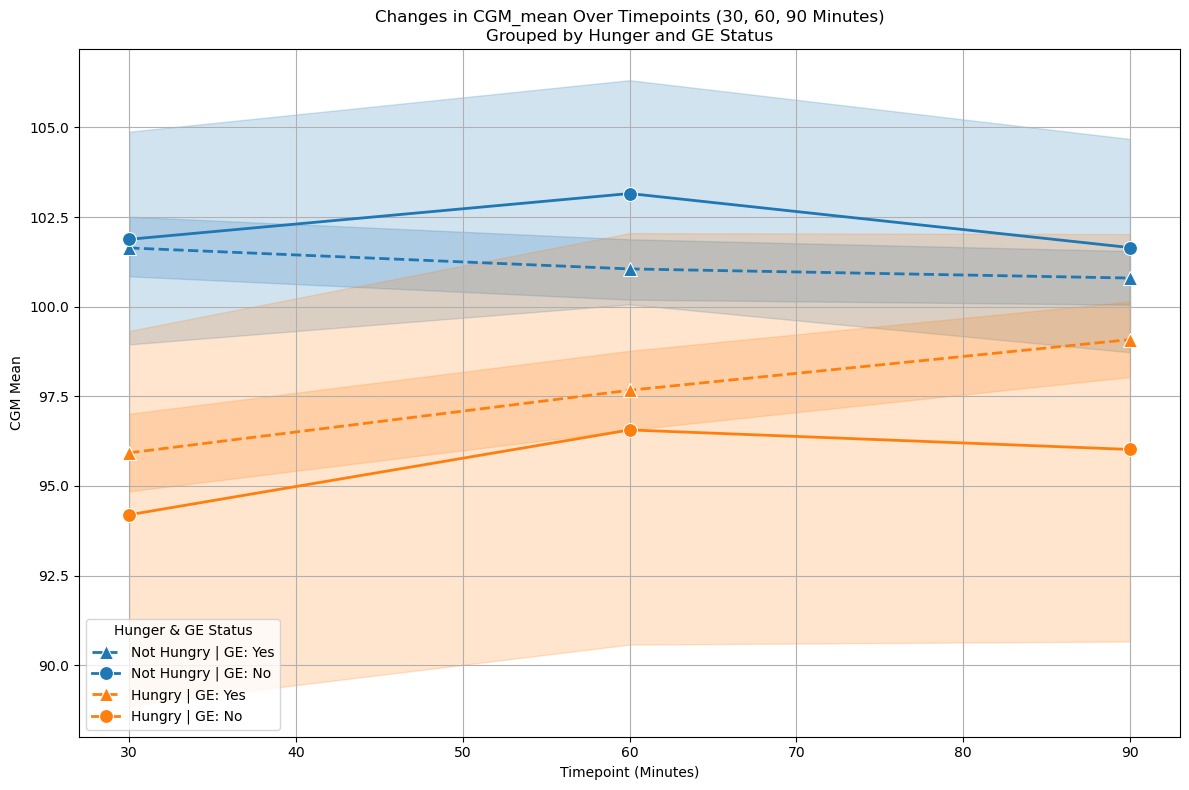

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

# 필요한 컬럼만 선택
plot_data = df_combined[['Timepoint', 'CGM_mean', 'hungry', 'GE_binary']].copy()

# 배고픔 여부와 GE 여부를 시각화에 맞게 변환
plot_data['Hunger Status'] = plot_data['hungry'].map({0: 'Not Hungry', 1: 'Hungry'})
plot_data['GE Status'] = plot_data['GE_binary'].map({0: 'GE: No', 1: 'GE: Yes'})

# 색상과 스타일 설정
palette = {'Not Hungry': 'C0', 'Hungry': 'C1'}  # 배고픔 상태 색상
linestyles = {'GE: No': '-', 'GE: Yes': '--'}  # GE 여부 선 스타일
markers = {'GE: No': 'o', 'GE: Yes': '^'}      # 마커 스타일 (GE: Yes → 삼각형)

# 그래프 그리기
plt.figure(figsize=(12, 8))

# 배고픔 상태와 GE 여부에 따라 그룹화
for hunger_status in plot_data['Hunger Status'].unique():
    for ge_status in plot_data['GE Status'].unique():
        subset = plot_data[(plot_data['Hunger Status'] == hunger_status) & 
                           (plot_data['GE Status'] == ge_status)]
        sns.lineplot(
            data=subset,
            x='Timepoint',
            y='CGM_mean',
            label=f"{hunger_status} | {ge_status}",
            linestyle=linestyles[ge_status],
            marker=markers[ge_status],
            color=palette[hunger_status],
            markersize=10,  # 마커 크기 확대
            lw=2            # 선 두께
        )

# 그래프 설정
plt.title("Changes in CGM_mean Over Timepoints (30, 60, 90 Minutes)\nGrouped by Hunger and GE Status")
plt.xlabel("Timepoint (Minutes)")
plt.ylabel("CGM Mean")
plt.legend(title="Hunger & GE Status")
plt.grid(True)
plt.tight_layout()

# 그래프 출력
plt.show()


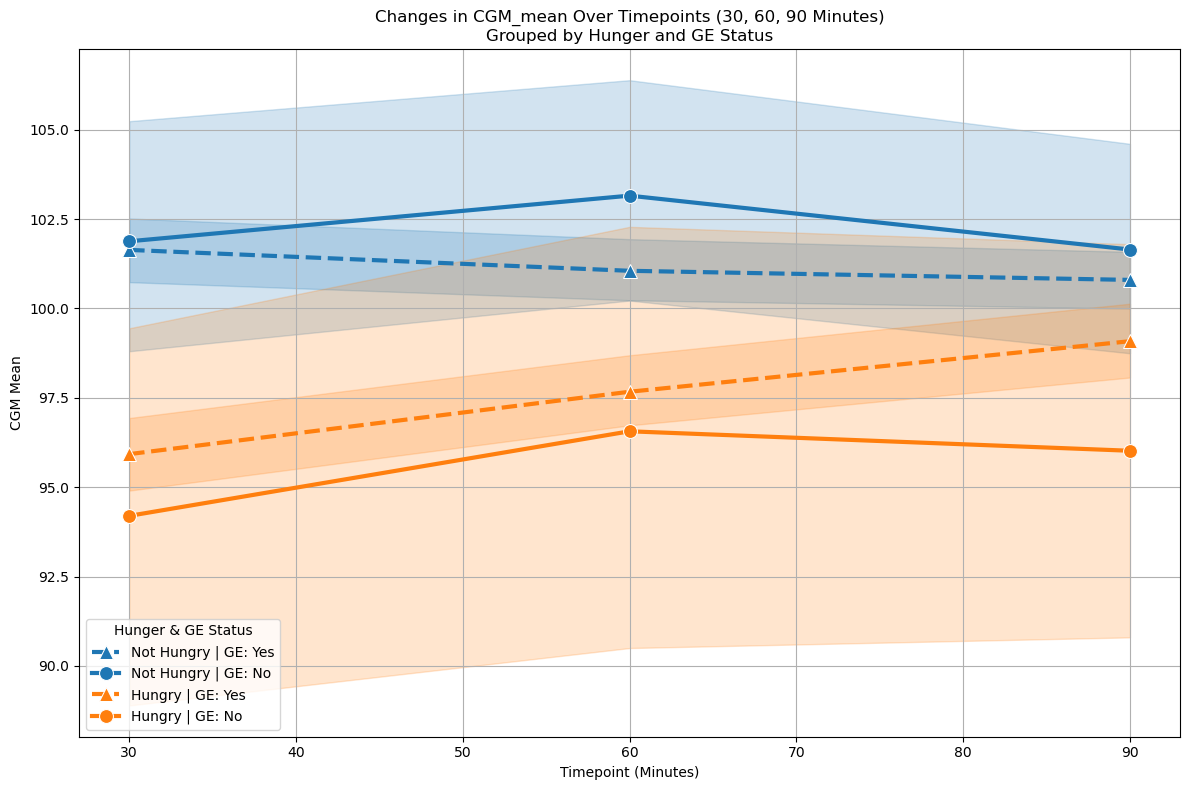

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

# 필요한 컬럼만 선택
plot_data = df_combined[['Timepoint', 'CGM_mean', 'hungry', 'GE_binary']].copy()

# 배고픔 여부와 GE 여부를 시각화에 맞게 변환
plot_data['Hunger Status'] = plot_data['hungry'].map({0: 'Not Hungry', 1: 'Hungry'})
plot_data['GE Status'] = plot_data['GE_binary'].map({0: 'GE: No', 1: 'GE: Yes'})

# 색상과 스타일 설정
palette = {'Not Hungry': 'C0', 'Hungry': 'C1'}  # 배고픔 상태 색상
linestyles = {'GE: No': '-', 'GE: Yes': '--'}  # GE 여부 선 스타일
markers = {'GE: No': 'o', 'GE: Yes': '^'}      # 마커 스타일 (GE: Yes → 삼각형)

# 그래프 그리기
plt.figure(figsize=(12, 8))

# 배고픔 상태와 GE 여부에 따라 그룹화
for hunger_status in plot_data['Hunger Status'].unique():
    for ge_status in plot_data['GE Status'].unique():
        subset = plot_data[(plot_data['Hunger Status'] == hunger_status) & 
                           (plot_data['GE Status'] == ge_status)]
        sns.lineplot(
            data=subset,
            x='Timepoint',
            y='CGM_mean',
            label=f"{hunger_status} | {ge_status}",
            linestyle=linestyles[ge_status],
            marker=markers[ge_status],
            color=palette[hunger_status],
            markersize=10,  # 마커 크기 확대
            lw=3,            # 선 두께
            
        )

# 그래프 설정
plt.title("Changes in CGM_mean Over Timepoints (30, 60, 90 Minutes)\nGrouped by Hunger and GE Status")
plt.xlabel("Timepoint (Minutes)")
plt.ylabel("CGM Mean")
plt.legend(title="Hunger & GE Status")
plt.grid(True)
plt.tight_layout()

# 그래프 출력
plt.show()

# 추가분석, 변수상관관계 -> 긍정, 부정 변수생성 -> 배고픔과 정서간의 상호작용 변수추가 -> within, between 추가 (12/31)

In [166]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드 (CSV 파일 경로는 본인의 데이터 경로로 설정)
import pandas as pd

# 엑셀 파일 불러오기
df = pd.read_excel('/Users/bg.lim/Downloads/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/Preprocessing/3.within_timepoint/Within_binary/within_binary2.xlsx', engine='openpyxl')  # 파일 경로 지정

df

,StudyID,Timestamp,bored,hungry,How_happy,How_cheerful,How_relaxed,How_stressed,How_anxious,How_angry,...,GE_90min_occurred,Date,Within_day,within_day_num,GE_binary,hungry_mean,hungry_within,CGM_combined_mean,Timepoint,CGM_mean
0,1,2022-10-06 08:11:56,0,0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,1,2022-10-06,1_2022-10-06,75,1,0.270270,-0.270270,89.000000,30,90.50
1,1,2022-10-06 08:11:56,0,0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,1,2022-10-06,1_2022-10-06,75,1,0.270270,-0.270270,89.000000,60,88.50
2,1,2022-10-06 08:11:56,0,0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,1,2022-10-06,1_2022-10-06,75,1,0.270270,-0.270270,89.000000,90,88.00
3,1,2022-10-06 13:37:27,0,0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,0,2022-10-06,1_2022-10-06,75,0,0.270270,-0.270270,96.083333,30,91.00
4,1,2022-10-06 13:37:27,0,0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,0,2022-10-06,1_2022-10-06,75,0,0.270270,-0.270270,96.083333,60,97.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10957,89,2023-05-09 15:28:26,0,0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,1,2023-05-09,89_2023-05-09,728,1,0.333333,-0.333333,85.166667,60,86.50
10958,89,2023-05-09 15:28:26,0,0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,1,2023-05-09,89_2023-05-09,728,1,0.333333,-0.333333,85.166667,90,85.50
10959,89,2023-05-09 19:16:58,0,0,1.000000,0.666667,1.000000,0.000000,0.000000,0.0,...,1,2023-05-09,89_2023-05-09,728,1,0.333333,-0.333333,137.666667,30,139.00
10960,89,2023-05-09 19:16:58,0,0,1.000000,0.666667,1.000000,0.000000,0.000000,0.0,...,1,2023-05-09,89_2023-05-09,728,1,0.333333,-0.333333,137.666667,60,137.00


In [172]:
# 각 열의 데이터 타입 확인
print(df.dtypes)

# 데이터프레임에 문자열이나 비수치 데이터가 있는지 확인
print(df.head())  # 데이터 샘플 확인


StudyID                           int64
Timestamp                datetime64[ns]
bored                             int64
hungry                            int64
How_happy                       float64
How_cheerful                    float64
How_relaxed                     float64
How_stressed                    float64
How_anxious                     float64
How_angry                       float64
How_sad                         float64
How_energetic                   float64
How_tired                       float64
How_lonely                      float64
DailyAvgLoneliness              float64
Weekday                           int64
Closest CGM Timestamp    datetime64[ns]
Closest_CGM_Glucose               int64
CGM_30min_mean                  float64
CGM_30min_sd                    float64
CGM_30min_max                     int64
CGM_30min_cv                    float64
CGM_30_GV                        object
CGM_30_GE_count                   int64
CGM_60min_mean                  float64


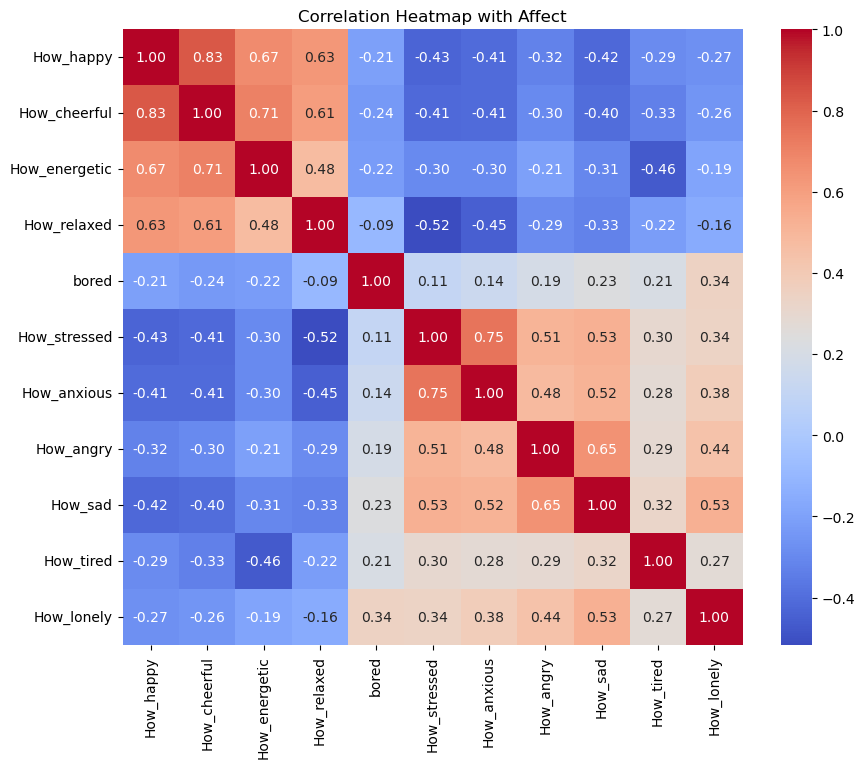

In [244]:
# 'bored'를 다섯 번째 위치로 이동
if 'bored' in selected_columns:
    selected_columns.remove('bored')  # 기존 위치에서 제거
    selected_columns.insert(4, 'bored')  # 다섯 번째 위치에 삽입 (인덱스 4)

# 필터링된 상관행렬 생성
filtered_corr_matrix = correlation_matrix.loc[selected_columns, selected_columns]

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap with Affect")


# 히트맵 이미지 저장
plt.savefig("new_correlation_heatmap.png", dpi=300, bbox_inches='tight')  # 원하는 파일명으로 저장
plt.show()



In [246]:
import os

# 현재 작업 디렉토리 확인
print(os.getcwd())


/Users/bg.lim/Downloads/TAMU_Agri


# 긍정, 부정 변수생성 -> 배고픔과 정서간의 상호작용 변수추가 -> within, between 추가 (1/1)

In [251]:
# 긍정적 정서 평균 생성
df['Positive_Emotion'] = df[['How_happy', 'How_cheerful', 'How_relaxed', 'How_energetic']].mean(axis=1)

# 부정적 정서 평균 생성 (bored와 How_tired 추가)
df['Negative_Emotion'] = df[['How_stressed', 'How_anxious', 'How_angry', 'How_sad', 'How_lonely', 'bored', 'How_tired']].mean(axis=1)

# 결과 확인
print(df[['Positive_Emotion', 'Negative_Emotion']].head())


   Positive_Emotion  Negative_Emotion
0          0.750000          0.142857
1          0.750000          0.142857
2          0.750000          0.142857
3          0.583333          0.142857
4          0.583333          0.142857


In [253]:
df

,StudyID,Timestamp,bored,hungry,How_happy,How_cheerful,How_relaxed,How_stressed,How_anxious,How_angry,...,Within_day,within_day_num,GE_binary,hungry_mean,hungry_within,CGM_combined_mean,Timepoint,CGM_mean,Positive_Emotion,Negative_Emotion
0,1,2022-10-06 08:11:56,0,0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,1_2022-10-06,75,1,0.270270,-0.270270,89.000000,30,90.50,0.750000,0.142857
1,1,2022-10-06 08:11:56,0,0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,1_2022-10-06,75,1,0.270270,-0.270270,89.000000,60,88.50,0.750000,0.142857
2,1,2022-10-06 08:11:56,0,0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,1_2022-10-06,75,1,0.270270,-0.270270,89.000000,90,88.00,0.750000,0.142857
3,1,2022-10-06 13:37:27,0,0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,1_2022-10-06,75,0,0.270270,-0.270270,96.083333,30,91.00,0.583333,0.142857
4,1,2022-10-06 13:37:27,0,0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,1_2022-10-06,75,0,0.270270,-0.270270,96.083333,60,97.75,0.583333,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10957,89,2023-05-09 15:28:26,0,0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,89_2023-05-09,728,1,0.333333,-0.333333,85.166667,60,86.50,0.750000,0.047619
10958,89,2023-05-09 15:28:26,0,0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,89_2023-05-09,728,1,0.333333,-0.333333,85.166667,90,85.50,0.750000,0.047619
10959,89,2023-05-09 19:16:58,0,0,1.000000,0.666667,1.000000,0.000000,0.000000,0.0,...,89_2023-05-09,728,1,0.333333,-0.333333,137.666667,30,139.00,0.750000,0.095238
10960,89,2023-05-09 19:16:58,0,0,1.000000,0.666667,1.000000,0.000000,0.000000,0.0,...,89_2023-05-09,728,1,0.333333,-0.333333,137.666667,60,137.00,0.750000,0.095238


In [263]:
import os
# 저장할 폴더와 파일 경로
folder_path = '/Users/bg.lim/Downloads/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/Preprocessing/5.Emo+Hunger'
file_path = os.path.join(folder_path, 'Posi_nega_plus.xlsx')

# 폴더 생성 및 엑셀 저장
df.to_excel(file_path, index=False, engine='openpyxl')

In [265]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm


# Mixed Linear Model 설정
model = mixedlm(
    "CGM_mean ~ hungry_within * Timepoint + hungry_within * Negative_Emotion + hungry_within * Positive_Emotion + hungry_mean + GE_binary + Timepoint",
    data=df,
    groups=df["StudyID"],
    re_formula="~1"
)

# 모델 적합
result = model.fit()

# 결과 출력
print(result.summary())


                   Mixed Linear Model Regression Results
Model:                   MixedLM       Dependent Variable:       CGM_mean   
No. Observations:        10962         Method:                   REML       
No. Groups:              74            Scale:                    276.4065   
Min. group size:         33            Log-Likelihood:           -46517.8986
Max. group size:         222           Converged:                Yes        
Mean group size:         148.1                                              
----------------------------------------------------------------------------
                                Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
----------------------------------------------------------------------------
Intercept                       98.806    2.936 33.651 0.000  93.051 104.561
hungry_within                  -10.650    1.517 -7.020 0.000 -13.624  -7.677
Timepoint                        0.006    0.006  0.905 0.366  -0.007   0.019
hungry_within:Timep

In [273]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm


# Mixed Linear Model 설정
model = mixedlm(
    "CGM_mean ~ hungry_within * Timepoint + hungry_within * Positive_Emotion * Negative_Emotion + hungry_mean + GE_binary + Timepoint",
    data=df,
    groups=df["StudyID"],
    re_formula="~1"
)

# 모델 적합
result = model.fit()

# 결과 출력
print(result.summary())

                            Mixed Linear Model Regression Results
Model:                        MixedLM             Dependent Variable:             CGM_mean   
No. Observations:             10962               Method:                         REML       
No. Groups:                   74                  Scale:                          276.2505   
Min. group size:              33                  Log-Likelihood:                 -46508.4685
Max. group size:              222                 Converged:                      Yes        
Mean group size:              148.1                                                          
---------------------------------------------------------------------------------------------
                                                 Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
---------------------------------------------------------------------------------------------
Intercept                                        99.265    2.953 33.612 0.000  93.476 10

In [267]:
# 각 긍정적 정서 항목을 독립 변수로 추가
model = mixedlm(
    "CGM_mean ~ hungry_within * How_happy + hungry_within * How_cheerful + hungry_within * How_relaxed + hungry_within * How_energetic + hungry_mean + GE_binary + Timepoint",
    data=df,
    groups=df["StudyID"],
    re_formula="~1"
)

# 모델 적합
result = model.fit()

# 결과 출력
print(result.summary())


                  Mixed Linear Model Regression Results
Model:                  MixedLM      Dependent Variable:      CGM_mean   
No. Observations:       10962        Method:                  REML       
No. Groups:             74           Scale:                   277.5249   
Min. group size:        33           Log-Likelihood:          -46531.9562
Max. group size:        222          Converged:               Yes        
Mean group size:        148.1                                            
-------------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
-------------------------------------------------------------------------
Intercept                   101.705    2.890 35.193 0.000  96.041 107.369
hungry_within                -6.160    0.844 -7.296 0.000  -7.815  -4.506
How_happy                    -1.340    1.151 -1.163 0.245  -3.596   0.917
hungry_within:How_happy       3.347    2.535  1.320 0.18

In [271]:
# 활발한 정서와 차분한 정서를 구분한 평균 변수 생성
df['Active_Emotion'] = df[['How_energetic', 'How_cheerful']].mean(axis=1)
df['Calm_Emotion'] = df[['How_relaxed', 'How_happy']].mean(axis=1)

model = mixedlm(
    "CGM_mean ~ hungry_within * (Active_Emotion + Calm_Emotion) + hungry_mean + GE_binary + Timepoint",
    data=df,
    groups=df["StudyID"],
    re_formula="~Active_Emotion + Calm_Emotion"
)
# 모델 적합
result = model.fit()

# 결과 출력
print(result.summary())


                     Mixed Linear Model Regression Results
Model:                     MixedLM        Dependent Variable:        CGM_mean   
No. Observations:          10962          Method:                    REML       
No. Groups:                74             Scale:                     267.0190   
Min. group size:           33             Log-Likelihood:            -46425.1722
Max. group size:           222            Converged:                 Yes        
Mean group size:           148.1                                                
--------------------------------------------------------------------------------
                                   Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------------------------------
Intercept                          100.472    3.340 30.077 0.000  93.925 107.019
hungry_within                       -5.914    0.831 -7.117 0.000  -7.543  -4.285
Active_Emotion                       1.236    2.04

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10962 entries, 0 to 10961
Data columns (total 52 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   StudyID                10962 non-null  int64         
 1   Timestamp              10962 non-null  datetime64[ns]
 2   bored                  10962 non-null  int64         
 3   hungry                 10962 non-null  int64         
 4   How_happy              10962 non-null  float64       
 5   How_cheerful           10962 non-null  float64       
 6   How_relaxed            10962 non-null  float64       
 7   How_stressed           10962 non-null  float64       
 8   How_anxious            10962 non-null  float64       
 9   How_angry              10962 non-null  float64       
 10  How_sad                10962 non-null  float64       
 11  How_energetic          10962 non-null  float64       
 12  How_tired              10962 non-null  float64       
 13  H

In [299]:
# 혼합효과모형 설정
model = smf.mixedlm(
    formula=(
        "CGM_mean ~ hungry_within * Timepoint + Positive_Emotion + Negative_Emotion "
        "+ hungry_within:Positive_Emotion + hungry_within:Negative_Emotion "
        "+ Positive_Emotion:Negative_Emotion + hungry_within:Positive_Emotion:Negative_Emotion "
        "+ hungry_mean + GE_binary"
    ),
    data=df,
    groups=df["StudyID"]
)

# 모델 피팅
result = model.fit()

# 결과 출력
print(result.summary())

                            Mixed Linear Model Regression Results
Model:                        MixedLM             Dependent Variable:             CGM_mean   
No. Observations:             10962               Method:                         REML       
No. Groups:                   74                  Scale:                          276.2505   
Min. group size:              33                  Log-Likelihood:                 -46508.4685
Max. group size:              222                 Converged:                      Yes        
Mean group size:              148.1                                                          
---------------------------------------------------------------------------------------------
                                                 Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
---------------------------------------------------------------------------------------------
Intercept                                        99.265    2.953 33.612 0.000  93.476 10

In [301]:
df

,StudyID,Timestamp,bored,hungry,How_happy,How_cheerful,How_relaxed,How_stressed,How_anxious,How_angry,...,within_day_num,GE_binary,hungry_mean,hungry_within,CGM_combined_mean,Timepoint,CGM_mean,Positive_Emotion,Negative_Emotion,CGM_calculated_mean
0,1,2022-10-06 08:11:56,0,0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,75,1,0.270270,-0.270270,89.000000,30,90.50,0.750000,0.142857,89.000000
1,1,2022-10-06 08:11:56,0,0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,75,1,0.270270,-0.270270,89.000000,60,88.50,0.750000,0.142857,89.000000
2,1,2022-10-06 08:11:56,0,0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,75,1,0.270270,-0.270270,89.000000,90,88.00,0.750000,0.142857,89.000000
3,1,2022-10-06 13:37:27,0,0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,75,0,0.270270,-0.270270,96.083333,30,91.00,0.583333,0.142857,96.083333
4,1,2022-10-06 13:37:27,0,0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,75,0,0.270270,-0.270270,96.083333,60,97.75,0.583333,0.142857,96.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10957,89,2023-05-09 15:28:26,0,0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,728,1,0.333333,-0.333333,85.166667,60,86.50,0.750000,0.047619,85.166667
10958,89,2023-05-09 15:28:26,0,0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,728,1,0.333333,-0.333333,85.166667,90,85.50,0.750000,0.047619,85.166667
10959,89,2023-05-09 19:16:58,0,0,1.000000,0.666667,1.000000,0.000000,0.000000,0.0,...,728,1,0.333333,-0.333333,137.666667,30,139.00,0.750000,0.095238,137.666667
10960,89,2023-05-09 19:16:58,0,0,1.000000,0.666667,1.000000,0.000000,0.000000,0.0,...,728,1,0.333333,-0.333333,137.666667,60,137.00,0.750000,0.095238,137.666667


<Figure size 1200x600 with 0 Axes>

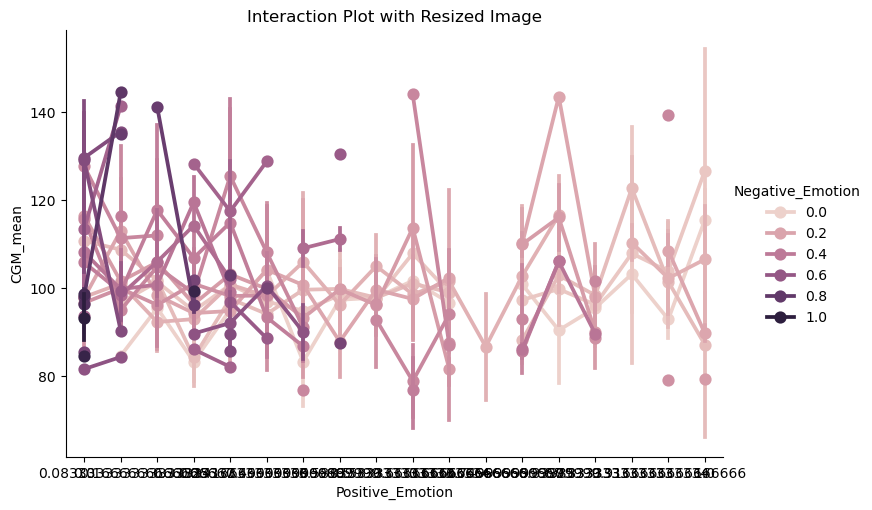

In [319]:
import matplotlib.pyplot as plt

# 이미지 크기 조정
plt.figure(figsize=(12, 6))  # 가로 12인치, 세로 6인치

sns.catplot(
    data=df.sample(2000, random_state=42),  # 데이터 크기 제한
    x="Positive_Emotion",
    y="CGM_mean",
    hue="Negative_Emotion",
    kind="point",
    aspect=1.5
)
plt.title("Interaction Plot with Resized Image")
plt.show()


In [331]:
df

,StudyID,Timestamp,bored,hungry,How_happy,How_cheerful,How_relaxed,How_stressed,How_anxious,How_angry,...,hungry_within,CGM_combined_mean,Timepoint,CGM_mean,Positive_Emotion,Negative_Emotion,CGM_calculated_mean,Pos_Emotion_High,Neg_Emotion_High,hungry_within_category
0,1,2022-10-06 08:11:56,0,0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,-0.270270,89.000000,30,90.50,0.750000,0.142857,89.000000,1,1,Medium
1,1,2022-10-06 08:11:56,0,0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,-0.270270,89.000000,30,88.50,0.750000,0.142857,89.000000,1,1,Medium
2,1,2022-10-06 08:11:56,0,0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,-0.270270,89.000000,30,88.00,0.750000,0.142857,89.000000,1,1,Medium
3,1,2022-10-06 13:37:27,0,0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,-0.270270,96.083333,30,91.00,0.583333,0.142857,96.083333,1,1,Medium
4,1,2022-10-06 13:37:27,0,0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,-0.270270,96.083333,30,97.75,0.583333,0.142857,96.083333,1,1,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10957,89,2023-05-09 15:28:26,0,0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,-0.333333,85.166667,30,86.50,0.750000,0.047619,85.166667,1,0,Medium
10958,89,2023-05-09 15:28:26,0,0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,-0.333333,85.166667,30,85.50,0.750000,0.047619,85.166667,1,0,Medium
10959,89,2023-05-09 19:16:58,0,0,1.000000,0.666667,1.000000,0.000000,0.000000,0.0,...,-0.333333,137.666667,30,139.00,0.750000,0.095238,137.666667,1,0,Medium
10960,89,2023-05-09 19:16:58,0,0,1.000000,0.666667,1.000000,0.000000,0.000000,0.0,...,-0.333333,137.666667,30,137.00,0.750000,0.095238,137.666667,1,0,Medium


In [333]:
# Timepoint 고유값 확인
print(df["Timepoint"].unique())


[30]
Categories (1, int64): [30]


In [325]:
# CGM_30min_mean 값 확인
print(df["CGM_30min_mean"].dropna().head(10))


0     90.5
1     90.5
2     90.5
3     91.0
4     91.0
5     91.0
6    108.5
7    108.5
8    108.5
9    104.5
Name: CGM_30min_mean, dtype: float64


In [327]:
# Timepoint 열을 재생성
df["Timepoint"] = df[["CGM_30min_mean", "CGM_60min_mean", "CGM_90min_mean"]].apply(
    lambda row: 30 if not pd.isna(row["CGM_30min_mean"]) else (60 if not pd.isna(row["CGM_60min_mean"]) else 90),
    axis=1
)

# Timepoint 열 고유값 확인
print(df["Timepoint"].unique())


[30]


In [329]:
# Timepoint를 범주형 변수로 변환
df["Timepoint"] = df["Timepoint"].astype("category")

# 혼합효과모형 설정 및 실행
model = smf.mixedlm(
    formula="CGM_mean ~ hungry_within * Timepoint + Positive_Emotion + Negative_Emotion",
    data=df,
    groups=df["StudyID"]
)
result = model.fit()

# 결과 출력
print(result.summary())


            Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  CGM_mean   
No. Observations:   10962    Method:              REML       
No. Groups:         74       Scale:               277.2793   
Min. group size:    33       Log-Likelihood:      -46536.8612
Max. group size:    222      Converged:           Yes        
Mean group size:    148.1                                    
-------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept         96.659    1.612  59.961 0.000 93.500 99.819
hungry_within     -3.953    0.379 -10.437 0.000 -4.696 -3.211
Positive_Emotion   3.239    1.247   2.597 0.009  0.794  5.684
Negative_Emotion   9.003    1.807   4.981 0.000  5.460 12.545
Group Var        142.617    1.454                            



# 시간대 별 분석 + 시각화

In [365]:
import pandas as pd

# 엑셀 파일 불러오기
df = pd.read_excel('/Users/bg.lim/Downloads/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/Preprocessing/5.Emo+Hunger/Posi_nega_plus.xlsx', engine='openpyxl') 
df

,StudyID,Timestamp,bored,hungry,How_happy,How_cheerful,How_relaxed,How_stressed,How_anxious,How_angry,...,Within_day,within_day_num,GE_binary,hungry_mean,hungry_within,CGM_combined_mean,Timepoint,CGM_mean,Positive_Emotion,Negative_Emotion
0,1,2022-10-06 08:11:56,0,0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,1_2022-10-06,75,1,0.270270,-0.270270,89.000000,30,90.50,0.750000,0.142857
1,1,2022-10-06 08:11:56,0,0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,1_2022-10-06,75,1,0.270270,-0.270270,89.000000,60,88.50,0.750000,0.142857
2,1,2022-10-06 08:11:56,0,0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,1_2022-10-06,75,1,0.270270,-0.270270,89.000000,90,88.00,0.750000,0.142857
3,1,2022-10-06 13:37:27,0,0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,1_2022-10-06,75,0,0.270270,-0.270270,96.083333,30,91.00,0.583333,0.142857
4,1,2022-10-06 13:37:27,0,0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,1_2022-10-06,75,0,0.270270,-0.270270,96.083333,60,97.75,0.583333,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10957,89,2023-05-09 15:28:26,0,0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,89_2023-05-09,728,1,0.333333,-0.333333,85.166667,60,86.50,0.750000,0.047619
10958,89,2023-05-09 15:28:26,0,0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,89_2023-05-09,728,1,0.333333,-0.333333,85.166667,90,85.50,0.750000,0.047619
10959,89,2023-05-09 19:16:58,0,0,1.000000,0.666667,1.000000,0.000000,0.000000,0.0,...,89_2023-05-09,728,1,0.333333,-0.333333,137.666667,30,139.00,0.750000,0.095238
10960,89,2023-05-09 19:16:58,0,0,1.000000,0.666667,1.000000,0.000000,0.000000,0.0,...,89_2023-05-09,728,1,0.333333,-0.333333,137.666667,60,137.00,0.750000,0.095238


In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10962 entries, 0 to 10961
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   StudyID                10962 non-null  int64         
 1   Timestamp              10962 non-null  datetime64[ns]
 2   bored                  10962 non-null  int64         
 3   hungry                 10962 non-null  int64         
 4   How_happy              10962 non-null  float64       
 5   How_cheerful           10962 non-null  float64       
 6   How_relaxed            10962 non-null  float64       
 7   How_stressed           10962 non-null  float64       
 8   How_anxious            10962 non-null  float64       
 9   How_angry              10962 non-null  float64       
 10  How_sad                10962 non-null  float64       
 11  How_energetic          10962 non-null  float64       
 12  How_tired              10962 non-null  float64       
 13  H

In [373]:
# Emotion 열 생성
df["Emotion"] = df["Positive_Emotion"] - df["Negative_Emotion"]
df

,StudyID,Timestamp,bored,hungry,How_happy,How_cheerful,How_relaxed,How_stressed,How_anxious,How_angry,...,within_day_num,GE_binary,hungry_mean,hungry_within,CGM_combined_mean,Timepoint,CGM_mean,Positive_Emotion,Negative_Emotion,Emotion
0,1,2022-10-06 08:11:56,0,0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,75,1,0.270270,-0.270270,89.000000,30,90.50,0.750000,0.142857,0.607143
1,1,2022-10-06 08:11:56,0,0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,75,1,0.270270,-0.270270,89.000000,60,88.50,0.750000,0.142857,0.607143
2,1,2022-10-06 08:11:56,0,0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,75,1,0.270270,-0.270270,89.000000,90,88.00,0.750000,0.142857,0.607143
3,1,2022-10-06 13:37:27,0,0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,75,0,0.270270,-0.270270,96.083333,30,91.00,0.583333,0.142857,0.440476
4,1,2022-10-06 13:37:27,0,0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,75,0,0.270270,-0.270270,96.083333,60,97.75,0.583333,0.142857,0.440476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10957,89,2023-05-09 15:28:26,0,0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,728,1,0.333333,-0.333333,85.166667,60,86.50,0.750000,0.047619,0.702381
10958,89,2023-05-09 15:28:26,0,0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,728,1,0.333333,-0.333333,85.166667,90,85.50,0.750000,0.047619,0.702381
10959,89,2023-05-09 19:16:58,0,0,1.000000,0.666667,1.000000,0.000000,0.000000,0.0,...,728,1,0.333333,-0.333333,137.666667,30,139.00,0.750000,0.095238,0.654762
10960,89,2023-05-09 19:16:58,0,0,1.000000,0.666667,1.000000,0.000000,0.000000,0.0,...,728,1,0.333333,-0.333333,137.666667,60,137.00,0.750000,0.095238,0.654762


# Emotion (pos-Neg) 컬럼 추가 저장

In [376]:
import os
# 저장할 폴더와 파일 경로
folder_path = '/Users/bg.lim/Downloads/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/Preprocessing/5.Emo+Hunger'
file_path = os.path.join(folder_path, 'Emotion(P_N).xlsx')

# 폴더 생성 및 엑셀 저장
os.makedirs(folder_path, exist_ok=True)  # 폴더가 없으면 생성
df.to_excel(file_path, index=False, engine='openpyxl')

/var/folders/r0/h30ywvr55x98xwjf49klh76m0000gp/T/ipykernel_94364/2696509516.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_means = df.groupby(["Emotion_bin", "hungry"])["CGM_30min_mean"].mean().reset_index()


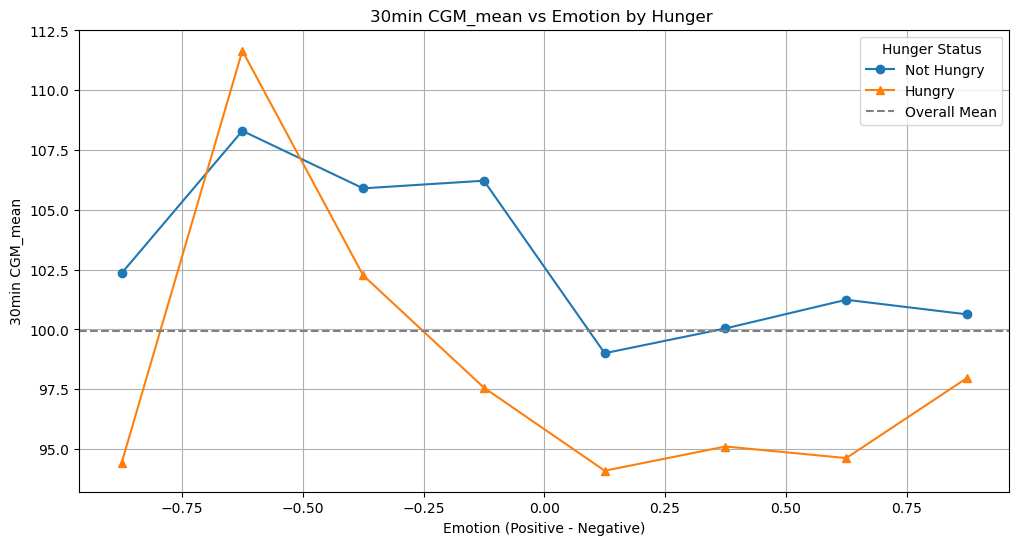

In [380]:
# Emotion을 -1부터 1까지 0.25 간격으로 나누어 그룹화
df["Emotion_bin"] = pd.cut(df["Emotion"], bins=np.arange(-1, 1.25, 0.25), right=False)
binned_means = df.groupby(["Emotion_bin", "hungry"])["CGM_30min_mean"].mean().reset_index()

# 범주형을 중심값으로 변환
binned_means["Emotion_bin_center"] = binned_means["Emotion_bin"].apply(lambda x: x.mid)

# 실제 데이터 그래프 생성
plt.figure(figsize=(12, 6))
for hunger in binned_means["hungry"].unique():
    subset = binned_means[binned_means["hungry"] == hunger]
    marker = "o" if hunger == 0 else "^"  # 동그라미: 0, 세모: 1
    label = "Not Hungry" if hunger == 0 else "Hungry"
    plt.plot(
        subset["Emotion_bin_center"],
        subset["CGM_30min_mean"],
        marker=marker,
        linestyle="-",
        label=label
    )

# 그래프 설정
plt.axhline(df["CGM_30min_mean"].mean(), color="gray", linestyle="--", label="Overall Mean")
plt.title("30min CGM_mean vs Emotion by Hunger ")
plt.xlabel("Emotion (Positive - Negative)")
plt.ylabel("30min CGM_mean")
plt.legend(title="Hunger Status")
plt.grid(True)
plt.show()


/var/folders/r0/h30ywvr55x98xwjf49klh76m0000gp/T/ipykernel_94364/3597215134.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_means_60 = df.groupby(["Emotion_bin", "hungry"])["CGM_60min_mean"].mean().reset_index()


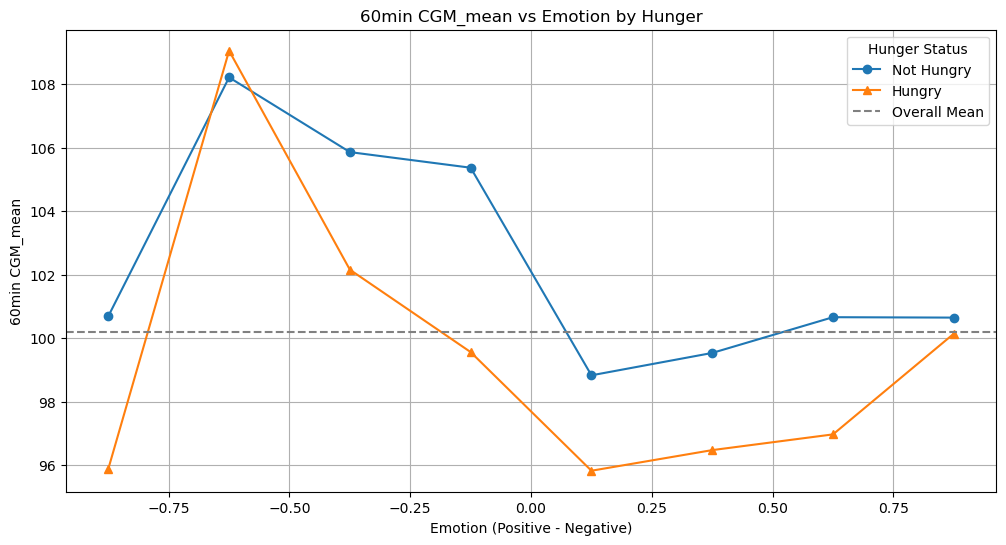

/var/folders/r0/h30ywvr55x98xwjf49klh76m0000gp/T/ipykernel_94364/3597215134.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_means_90 = df.groupby(["Emotion_bin", "hungry"])["CGM_90min_mean"].mean().reset_index()


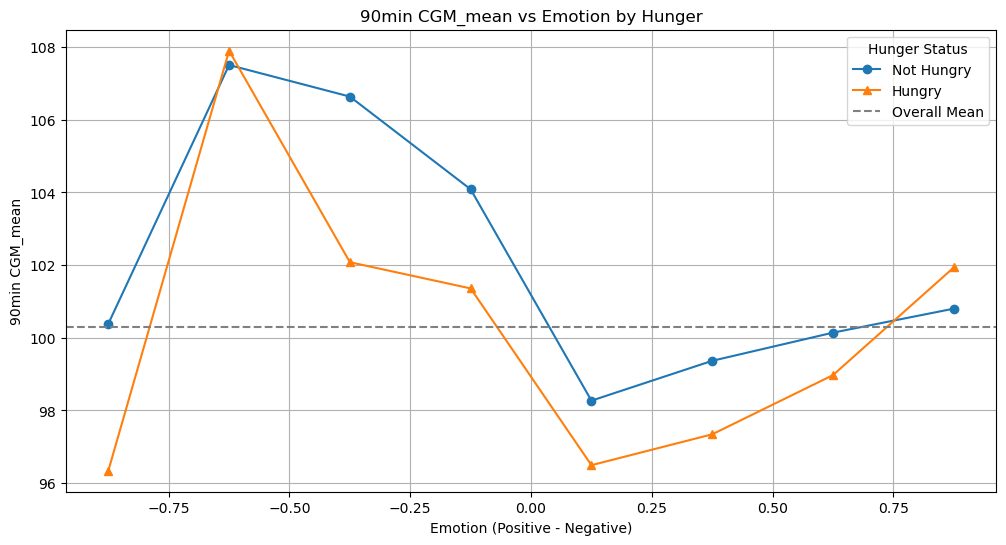

In [382]:
# Emotion을 -1부터 1까지 0.25 간격으로 나누어 그룹화
df["Emotion_bin"] = pd.cut(df["Emotion"], bins=np.arange(-1, 1.25, 0.25), right=False)

# 60분 데이터 그래프 생성
binned_means_60 = df.groupby(["Emotion_bin", "hungry"])["CGM_60min_mean"].mean().reset_index()
binned_means_60["Emotion_bin_center"] = binned_means_60["Emotion_bin"].apply(lambda x: x.mid)

plt.figure(figsize=(12, 6))
for hunger in binned_means_60["hungry"].unique():
    subset = binned_means_60[binned_means_60["hungry"] == hunger]
    marker = "o" if hunger == 0 else "^"  # 동그라미: 0, 세모: 1
    label = "Not Hungry" if hunger == 0 else "Hungry"
    plt.plot(
        subset["Emotion_bin_center"],
        subset["CGM_60min_mean"],
        marker=marker,
        linestyle="-",
        label=label
    )

plt.axhline(df["CGM_60min_mean"].mean(), color="gray", linestyle="--", label="Overall Mean")
plt.title("60min CGM_mean vs Emotion by Hunger")
plt.xlabel("Emotion (Positive - Negative)")
plt.ylabel("60min CGM_mean")
plt.legend(title="Hunger Status")
plt.grid(True)
plt.show()

# 90분 데이터 그래프 생성
binned_means_90 = df.groupby(["Emotion_bin", "hungry"])["CGM_90min_mean"].mean().reset_index()
binned_means_90["Emotion_bin_center"] = binned_means_90["Emotion_bin"].apply(lambda x: x.mid)

plt.figure(figsize=(12, 6))
for hunger in binned_means_90["hungry"].unique():
    subset = binned_means_90[binned_means_90["hungry"] == hunger]
    marker = "o" if hunger == 0 else "^"  # 동그라미: 0, 세모: 1
    label = "Not Hungry" if hunger == 0 else "Hungry"
    plt.plot(
        subset["Emotion_bin_center"],
        subset["CGM_90min_mean"],
        marker=marker,
        linestyle="-",
        label=label
    )

plt.axhline(df["CGM_90min_mean"].mean(), color="gray", linestyle="--", label="Overall Mean")
plt.title("90min CGM_mean vs Emotion by Hunger")
plt.xlabel("Emotion (Positive - Negative)")
plt.ylabel("90min CGM_mean")
plt.legend(title="Hunger Status")
plt.grid(True)
plt.show()
